In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas_datareader.data as web
from pandas_datareader import Options #Experimental
import datetime
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
#%matplotlib inline
%matplotlib notebook

In [78]:
# Resident Population in Santa Clara County, CA
# https://www.quandl.com/data/FRED/CASANT5POP-Resident-Population-in-Santa-Clara-County-CA
# In thousands of people
# FRED/CASANT5POP

In [80]:
#scpop = quandl.get('FRED/CASANT5POP')
#scpop.to_csv('santaclaraco_pop.csv', sep=',')

In [ ]:
# Zillow Home Value Index (County): Median Sold Price - All Homes - Santa Clara, CA
# https://www.quandl.com/data/ZILLOW/CO13_MSPAH-Zillow-Home-Value-Index-County-Median-Sold-Price-All-Homes-Santa-Clara-CA
# ZILLOW/CO13_MSPAH

In [ ]:
#zmsp_santaclara = quandl.get('ZILLOW/CO13_MSPAH')
#zmsp_santaclara.to_csv('zillow_co13_mspah.csv', sep=',')

In [ ]:
# Zillow Housing Inventory Measure
# https://www.quandl.com/data/ZILLOW/CO13_IMP-Zillow-Home-Value-Index-County-Inventory-Measure-Public-Santa-Clara-CA
# ZILLOW/CO13_IMP

In [ ]:
#sc_inventory = quandl.get('ZILLOW/CO13_IMP')
#sc_inventory.to_csv('zillow_co13_IMP.csv', sep=',')

In [ ]:
# Estimate of Median Household Income for Santa Clara County, CA
# https://www.quandl.com/data/FRED/MHICA06085A052NCEN-Estimate-of-Median-Household-Income-for-Santa-Clara-County-CA
# FRED/MHICA06085A052NCEN

In [ ]:
#mhic_sc = quandl.get('FRED/MHICA06085A052NCEN')
#mhic_sc.to_csv('santa_clara_mhic.csv', sep=',')

In [208]:
scpop = pd.read_csv('santaclaraco_pop.csv', index_col='Date')
scpop.rename(columns={"Value":"Population"}, inplace=True)
scpop.index = pd.to_datetime(scpop.index)
scpop['Population'] = scpop['Population']*1000

In [180]:
scmsp = pd.read_csv('zillow_co13_mspah.csv', index_col='Date')
scmsp.rename(columns={"Value":"Median Sold Price"}, inplace=True)
scmsp.index = pd.to_datetime(df_zmsp.index)

In [183]:
scinv = pd.read_csv('zillow_co13_IMP.csv', index_col='Date')
scinv.rename(columns={'Value': 'Housing Inventory'}, inplace=True)
scinv.index = pd.to_datetime(df_sc_imp.index)

In [184]:
# df.resample(rule='A').mean()
scinv_year = scinv.resample(rule='AS').mean()

In [185]:
scincome = pd.read_csv('santa_clara_mhic.csv', index_col='DATE')
scincome.rename(columns={"VALUE":"Median Household Income"}, inplace=True)
scincome.index.rename("Date", inplace=True)
scincome.index = pd.to_datetime(scincome.index)

In [186]:
# df.resample(rule='A').mean()
scmsp_year = scmsp.resample(rule='AS').mean()

In [149]:
#santaclaraco = pd.merge(df_zmsp_year, df_mhicsc, how='inner', left_index=True, right_index=True)

In [150]:
#santaclaraco = pd.merge(santaclaraco, scpop, how='inner', left_index=True, right_index=True)

In [151]:
#santaclaraco['Population'] = santaclaraco['Population']*1000

In [179]:
#santaclaraco[['Median Household Income', 'Median Sold Price']].plot(figsize=(8,4), ylim=(0,800000))

In [265]:
pop_by_inv = pd.merge(scpop, scinv.resample(rule='AS').mean(), how='inner', left_index=True, right_index=True)

<IPython.core.display.Javascript object>


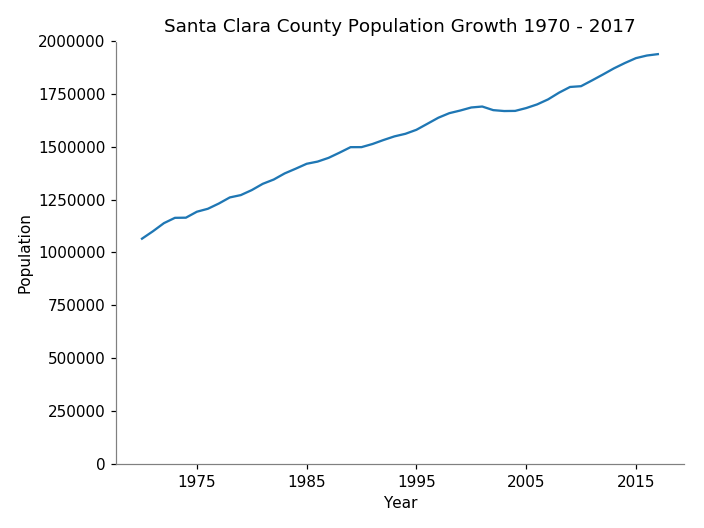

In [266]:
fig = plt.figure()
plt.axes(frameon=True)
ax = fig.gca()
ax.grid(axis='none')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('white')
plt.plot(scpop)
plt.title("Santa Clara County Population Growth 1970 - 2017")
plt.ylim((0, 2000000))
plt.ylabel("Population")
plt.xlabel("Year")
plt.tight_layout()

<IPython.core.display.Javascript object>


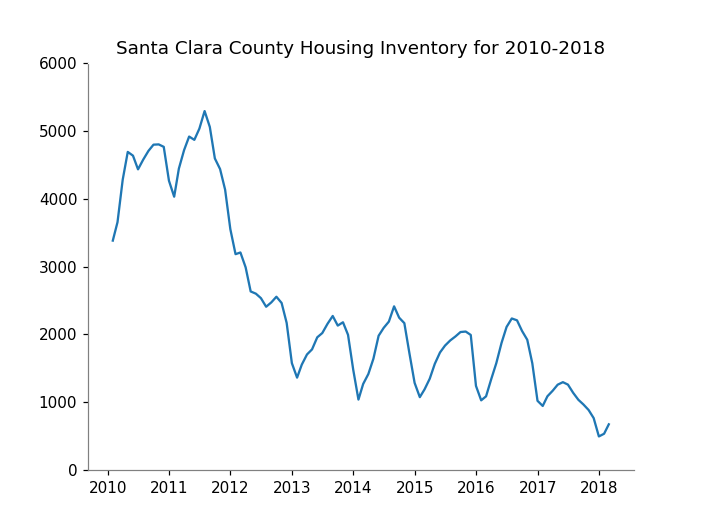

Text(0.5,1,'Santa Clara County Housing Inventory for 2010-2018')

In [241]:
fig = plt.figure()
ax = fig.gca()
ax.grid(axis='none')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('white')
plt.plot(scinv)
plt.ylim((0,6000))
plt.title("Santa Clara County Housing Inventory for 2010-2018")

<IPython.core.display.Javascript object>


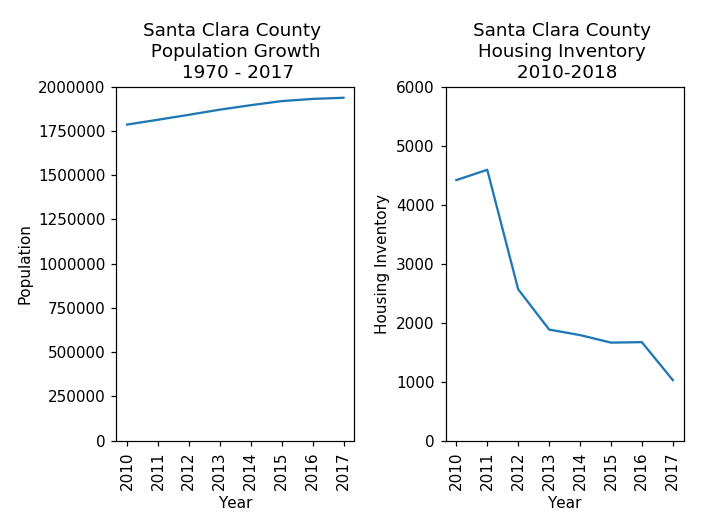

In [303]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False)
#plt.axes(frameon=True)
#ax1.grid(axis='none')
#ax1.spines['bottom'].set_color('grey')
#ax1.spines['top'].set_color('white')
#ax1.spines['left'].set_color('grey')
#ax1.spines['right'].set_color('white')
ax1.plot(pop_by_inv['Population'])
ax1.set_title("Santa Clara County \n Population Growth \n 1970 - 2017")
for t in ax1.get_xticklabels():
    t.set_rotation(90)
ax1.set_ylabel("Population")
ax1.set_xlabel("Year")
ax1.set_ylim(0,2000000)
ax2.plot(pop_by_inv['Housing Inventory'])
ax2.set_title("Santa Clara County \nHousing Inventory \n 2010-2018")
for t in ax2.get_xticklabels():
    t.set_rotation(90)
ax2.set_ylabel("Housing Inventory")
ax2.set_xlabel("Year")
ax2.set_ylim(0,6000)
plt.tight_layout()